In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L2 

In [2]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
src = '/Users/user/Downloads/Dataset'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(src,
                                                    target_size=(224, 224),
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(src,
                                                         target_size=(224, 224),
                                                         batch_size=100,
                                                         class_mode='categorical',
                                                         subset='validation')


Found 28459 images belonging to 22 classes.
Found 7111 images belonging to 22 classes.


In [4]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=L2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(22, activation='softmax')
])


2022-06-01 13:54:00.807338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [6]:
history = model.fit(train_generator,
                    epochs = 5, 
                    verbose = 1, 
                    validation_data = validation_generator)

Epoch 1/5
285/285 [==============================] - 1319s 5s/step - loss: 2.3487 - accuracy: 0.3805 - val_loss: 1.5738 - val_accuracy: 0.5521
Epoch 2/5
285/285 [==============================] - 1423s 5s/step - loss: 1.2396 - accuracy: 0.6742 - val_loss: 1.4278 - val_accuracy: 0.6224
Epoch 3/5
285/285 [==============================] - 1297s 5s/step - loss: 1.0390 - accuracy: 0.7459 - val_loss: 1.7917 - val_accuracy: 0.4908
Epoch 4/5
285/285 [==============================] - 1297s 5s/step - loss: 0.9495 - accuracy: 0.7813 - val_loss: 1.2005 - val_accuracy: 0.6856
Epoch 5/5
285/285 [==============================] - 1297s 5s/step - loss: 0.8486 - accuracy: 0.8102 - val_loss: 1.4462 - val_accuracy: 0.6154


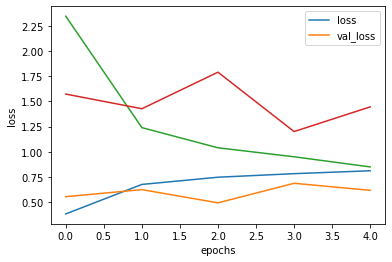

In [7]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [11]:
history_2 = model.fit(train_generator, 
                      epochs = 10, 
                      initial_epoch =history.epoch[-1], 
                      validation_data= validation_generator)

Epoch 5/10
285/285 [==============================] - 1448s 5s/step - loss: 0.7915 - accuracy: 0.8282 - val_loss: 1.1262 - val_accuracy: 0.7244
Epoch 6/10
285/285 [==============================] - 1653s 6s/step - loss: 0.7439 - accuracy: 0.8463 - val_loss: 1.1615 - val_accuracy: 0.7255
Epoch 7/10
285/285 [==============================] - 1585s 6s/step - loss: 0.7178 - accuracy: 0.8572 - val_loss: 1.2131 - val_accuracy: 0.7353
Epoch 8/10
285/285 [==============================] - 1633s 6s/step - loss: 0.6799 - accuracy: 0.8657 - val_loss: 1.1203 - val_accuracy: 0.7517
Epoch 9/10
285/285 [==============================] - 1606s 6s/step - loss: 0.6546 - accuracy: 0.8750 - val_loss: 0.9812 - val_accuracy: 0.7682
Epoch 10/10
285/285 [==============================] - 1345s 5s/step - loss: 0.6326 - accuracy: 0.8825 - val_loss: 1.1110 - val_accuracy: 0.7369


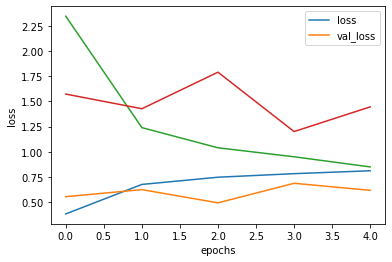

In [12]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show

plot_graph(history, 'accuracy')
plot_graph(history, 'loss')